In [1]:
import lib_Experimentum as Exp

import  numpy               as np
import  h5py 
from    scipy.io            import loadmat
from    matplotlib.pyplot   import plot
import  matplotlib.pyplot   as plt


import  time
from    scipy.optimize      import least_squares
from    scipy.optimize      import leastsq

In [2]:
data    = loadmat('../y_data.mat')
y       = np.array(data['y1'])

Cojone  modifica le cose in modo che la funzione apra da sola il file.mat




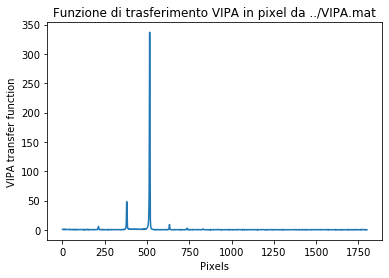

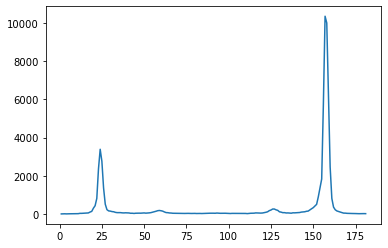

In [3]:
Spettro     =  Exp.Spectrum()
Spettro.Get_Spectrum(y,model= 'Real', nu0 = 0, offset=183.)
Spettro.y   =  np.reshape(Spettro.y, len(Spettro.y))#passaggio necessario Matlab

Spettro.Get_VIPA_mat("../VIPA.mat", path = '', tunable = 0, fig='VIPA_pix')
#'Vipa_notunable_08_11.tif' 
plt.figure()
plot(Spettro.x_pix, Spettro.y)

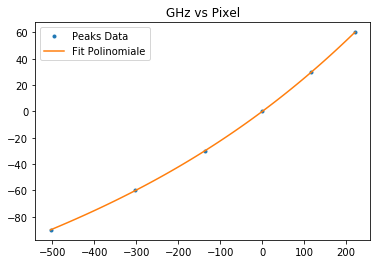

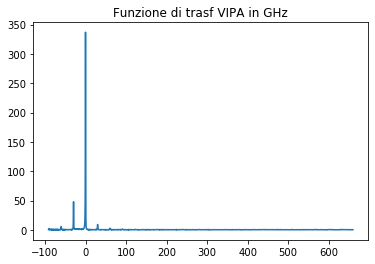

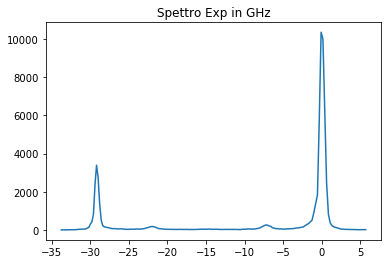

In [4]:
Spettro.Fit_Pixel2GHz(altezza = 1,fig = True)

Spettro.VIPA_Pix2GHz(fig=True)

Spettro.Spectrum_Pix2GHz(fig=True)





 Ho trovato 4 picchi nel tuo spettro sperimentale


 Il picco 1 ha 	 indice = 23 	 frequenza(GHz) = -29.20 	 ampiezza(GHz) = 3.19 


 Il picco 2 ha 	 indice = 58 	 frequenza(GHz) = -21.99 	 ampiezza(GHz) = 6.21 


 Il picco 3 ha 	 indice = 126 	 frequenza(GHz) = -7.07 	 ampiezza(GHz) = 5.93 


 Il picco 4 ha 	 indice = 156 	 frequenza(GHz) = -0.07 	 ampiezza(GHz) = 3.41 



Ho stimato 7 parametri iniziali per il fit che andrai a fare
 Tutti gli altri sono a zero
Co  = 1.000 

Omega  = 7.463 

Gamma  = 0.607 

Delta  = 0.607 

tau  = 1.000 

delta_amplitude  = 0.000 

delta_width  = 0.500 



Text(0.5, 1.0, 'Spettro Exp Counts vs GHz')

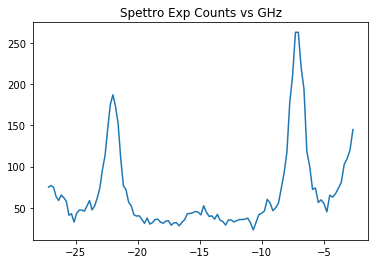

In [27]:
Spettro.Cut_n_Estimate_Spectrum(cut = True, altezza = 100, verbose = True)

plt.figure()
plot(Spettro.x_freq, Spettro.y)
plt.title('Spettro Exp Counts vs GHz')

In [6]:
Spettro.p0.T

,0
Co,1.000000
Omega,14.925794
Gamma,0.606946
Delta,0.606946
tau,1.000000
delta_amplitude,0.000000
delta_width,0.500000


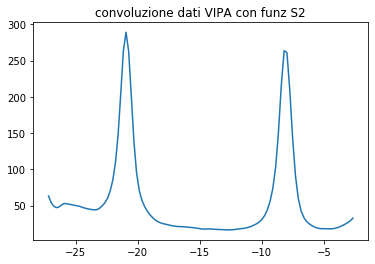

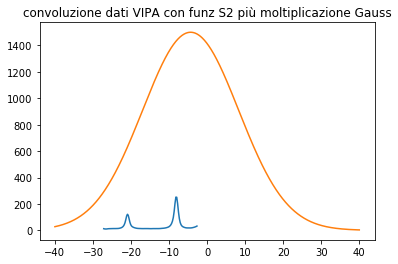

In [61]:
#       nomenclatura:   p[0] = Co
#                       p[1] = Omega
#                       p[2] = Gamma
#                       p[3] = Delta
#                       p[4] = tau
#   questi ultimi       p[5] = shift
#   per forza           p[6] = offset
#
#   param gauss         p[7] = mu sinc
#                       p[8] = sigma sinc
#
#  param delta          p[9] = delta width
#                       p[10] = delta amplitude
p0  =   np.array([Spettro.p0['Co'][0], Spettro.p0['Omega'][0], Spettro.p0['Gamma'][0], Spettro.p0['Delta'][0], Spettro.p0['tau'][0], 0.,0., -4.3, 12.36, Spettro.p0['delta_width'][0], Spettro.p0['delta_amplitude'][0]])
p1  =   np.array([ 1.01725773e-01,  7.0996193e+00,  1.34186482e-01, +5.98538365e+01,1.12152451e+01,  3.95751972e-01,  0., -4.331213478321924, 12.623888700029008,  0.5394062e+00,  0.213519994])
_ = Spettro.Gauss_Convolve_Theoretical_Response(p1, fig = True, fantoccio = False)
x = np.linspace(-40, 40, 1000)
y = gaussian(x, A=1500, mu=-4.33, sigma=12.62)
plot(x, y)

In [16]:
p0  =   np.array([Spettro.p0['Co'][0], Spettro.p0['Omega'][0], Spettro.p0['Gamma'][0], Spettro.p0['Delta'][0], Spettro.p0['tau'][0], 0.,0., -4.3, 12.6, Spettro.p0['delta_width'][0], Spettro.p0['delta_amplitude'][0]])
p0

array([ 1.        , 14.92579404,  0.60694574,  0.60694574,  1.        ,
        0.        ,  0.        , -4.3       , 12.6       ,  0.5       ,
        0.        ])

<bound method ModelResult.fit_report of <lmfit.model.ModelResult object at 0x000001B3BA90D320>>
{'A': 356.7179932369999, 'mu': -4.331213478321924, 'sigma': 12.623888700029008}


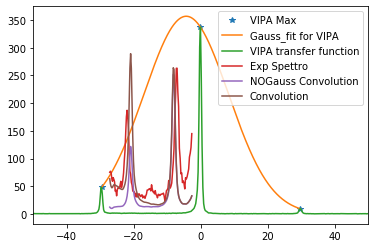

In [63]:

from lib_Experimentum import Spectrum
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from    scipy.io            import loadmat
from    matplotlib.pyplot   import plot
import  matplotlib.pyplot   as plt
from lmfit import Model
from scipy.stats import norm

def gaussian  (x,A, mu, sigma):

    return (A*np.exp(-0.5*((x-mu)/sigma)**2))


# %%
VIPA = Spectrum()

VIPA.Get_VIPA_mat('VIPA.mat', path = '../', tunable = 0, offset = 183.)

#%%

VIPA.Fit_Pixel2GHz(altezza = 1)
VIPA.VIPA_Pix2GHz()


#%%
Picchi = find_peaks(VIPA.y_VIPA, height=9, width=0.001)

gmod = Model(gaussian)
result = gmod.fit(Picchi[1]['peak_heights'], x = VIPA.x_VIPA_freq[Picchi[0]], A = 1., mu = 1, sigma = 1)
print(result.fit_report)
A = result.values['A']
mu = result.values['mu']
sigma = result.values['sigma']

x = np.linspace(VIPA.x_VIPA_freq[Picchi[0]].min(), VIPA.x_VIPA_freq[Picchi[0]].max(), 1000)
#y = 32*gaussian(x, A, mu, sigma)
y = gaussian(x, A, mu, sigma)
plot(VIPA.x_VIPA_freq[Picchi[0]], Picchi[1]['peak_heights'], '*', label = 'VIPA Max')
plot(x,y,label = 'Gauss_fit for VIPA')
plot(VIPA.x_VIPA_freq, VIPA.y_VIPA, label = 'VIPA transfer function')
plt.xlim(-50,50)
plt.plot(Spettro.x_freq, Spettro.y, label = 'Exp Spettro')
plt.plot(Spettro.x_freq, Spettro.y_Gauss_convolution, label = 'NOGauss Convolution')
plt.plot(Spettro.x_freq, Spettro.y_convolution, label = 'Convolution')
plt.legend()
plt.show()

print(result.values)


In [11]:
#bounds    =    ([0,0,0,0,0,-np.inf,-np.inf,-4.332, 12.6237, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, -4.330, 12.6239, np.inf, np.inf])
bounds    =    ([0,0,0,0,0,-np.inf,-np.inf,-np.inf, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

Spettro.Non_Linear_Least_Squares(p1, my_method = 'least_squares',  bound = bounds, verbose = 2, fig = True)

Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4625e+08                                    1.76e+08    
       1              4         4.1614e+07      1.05e+08       7.74e-01       5.93e+07    
       2              6         2.6615e+07      1.50e+07       3.87e-01       3.70e+07    
       3              7         2.6172e+07      4.43e+05       7.76e-01       2.54e+08    
       4              8         1.3380e+07      1.28e+07       1.96e-01       2.71e+07    
       5              9         1.1327e+07      2.05e+06       5.26e-01       8.64e+07    
       6             10         9.6911e+06      1.64e+06       3.96e-01       1.56e+07    
       7             11         9.3851e+06      3.06e+05       8.08e-01       9.93e+07    
       8             12         8.4867e+06      8.98e+05       9.10e-01       4.77e+07    
       9             14         8.2547e+06      2.32e+05       5.45e-01       9.52e+06    
  

KeyboardInterrupt: 

In [12]:
Parameters  = Spettro.res_lsq.x
J                =    Spettro.res_lsq.jac
cov              =    np.linalg.inv(J.T.dot(J))
Delta_Parameters =    np.sqrt(np.diagonal(cov))

import pandas as pd

df = pd.DataFrame((Parameters, Delta_Parameters), index = ('Values', 'StdErrs'), columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'shift', 'offset', 'Mu_Gauss', 'Sigma_Gauss', 'Delta_width','Delta_Factor'))
df.T

AttributeError: 'Spectrum' object has no attribute 'res_lsq'

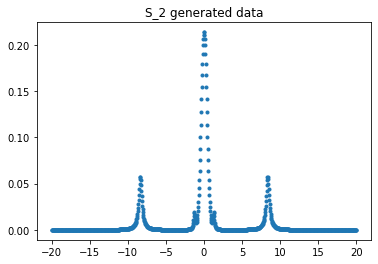

In [67]:
#Verifica del fit
Parameters = p1
_, _= Exp.S_2_Generate(Parameters[0], Parameters[1],Parameters[2], Parameters[3], Parameters[4], Parameters[9],Parameters[10] , x_min = -20, x_max= 20, density=1000, fig = True)

In [16]:
Spettro.res_lsq

 active_mask: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        cost: 114420.83345930258
         fun: array([-1.80075213e+01, -1.94216003e+01, -1.67144928e+01, -4.89909804e+00,
       -6.19759824e-02, -6.28500940e+00, -2.87546619e+00,  1.78770006e+00,
        1.87144709e+01,  1.71484933e+01,  2.73347157e+01,  1.66717636e+01,
        1.30184610e+01,  1.30776285e+01,  1.46263456e+01,  8.66951387e+00,
        2.13202110e+00,  1.37817597e+01,  8.99887489e+00, -2.24111975e-01,
       -1.21281668e+01, -3.41872223e+01, -5.07227705e+01, -8.25181966e+01,
       -1.11740633e+02, -1.23478178e+02, -1.09354221e+02, -8.79882795e+01,
       -4.56880919e+01, -1.33729739e+01, -8.34374351e+00,  6.48556535e+00,
        1.08943806e+01,  2.12777428e+01,  2.26455706e+01,  2.20067754e+01,
        2.61382166e+01,  3.07384595e+01,  2.40432041e+01,  3.11331070e+01,
        2.90877993e+01,  2.51399189e+01,  2.47522130e+01,  2.80023167e+01,
        2.94290484e+01,  2.66479127e+01,  2.61204278e+01,  3.15388170e+01

In [1]:
#STIMA PARAMETRI INIZIALI GAUSSIANA CHE INVILUPPA

p1  =   np.array([ 8.87793597e-02,  7.42693736e+00,  1.52925481e-01, 476,
        1.29325889e+03,  4.61913585e-01,  3.0316947e+01, -3.7,
        13.18371118e+00, +8.43854000e-03])
#Parameters = p1
plot(Spettro.x_VIPA_freq, Spettro.y_VIPA)
x = np.linspace(-100,100,1000)
y = 350*(np.exp(-((x-Parameters[7])**2)/(2*(Parameters[8]**2))))
plot(x,y)
plt.xlim(-35, 35)

NameError: name 'np' is not defined

In [48]:
Spettro.res_lsq

 active_mask: array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1])
        cost: 3176.28777628206
         fun: array([-24.81258561, -22.34291327, -17.01167379,  -4.70041882,
        -1.74208506, -11.66267947, -12.37258365, -11.26793606,
         2.98675809,  -0.35498166,   8.90913913,  -2.08589001,
        -5.63708061,  -5.15221558,  -2.75668457,  -7.37169821,
       -12.04032477,   2.31024647,   1.86524247,  -0.52393946,
        -1.99936319,  -8.06976665,  -0.10797857,   1.32341415,
         3.98238603,   4.78737597,   3.63292107,  -8.98622192,
        -2.11166143,   4.90798198,  -5.01603226,   1.25357559,
         0.22459176,   6.79847164,   5.43688754,   2.94068698,
         5.71766134,   9.40536993,   2.30145805,   9.39315921,
         7.43903584,   3.49719024,   3.10157702,   6.3988397 ,
         7.71600845,   4.81242137,   4.17984033,   9.45420735,
         6.30958849,   5.9565058 ,   9.4194801 ,   4.73158767,
         0.88352799,  -6.8269051 ,  -6.87518757,  -7.6966644 ,
        -8.

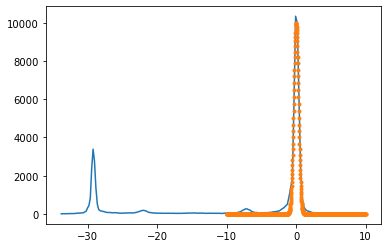

In [22]:
def delta_function (x, a, C):
    return C*np.exp(-(x/a)**2/(np.abs(a)*np.sqrt(np.pi)))



x = np.linspace(-10, 10, 1000)
y = delta_function(x, .5, 10000)

plot(Spettro.x_freq, Spettro.y)
plot(x,y, '.')

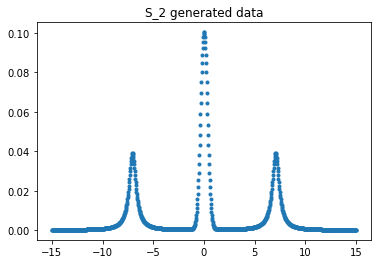

In [3]:
_,_=Exp.S_2_Generate(0.1, 7., 0.2, 0.2, 1., 0.5, 0.1, -15, 15, 1000, fig = True)